<a href="https://colab.research.google.com/github/manjuiitm/mlprojects/blob/main/business/business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Forecasting is one of the applications of Time Series Forecasting. In Business Forecasting, we aim to forecast future sales, expenditure, or revenue by using the historical Time Series data generated by the business. So, if you want to learn how to perform business forecasting, this article is for you. In this article, I will take you through the task of Business Forecasting using Python.

# Why does a Business Needs Business Forecasting?

Every business is looking for strategies to improve its profits. Data science professionals play a major role in providing the most accurate predictions for any given time. The data generated by a company is always handy for analyzing the future behaviour of target customers. By predicting future business trends, a business can make better decisions to improve its future performance.

I hope you have understood why a business today needs to use business forecasting techniques. Forecasting sales, revenue or expenditure are some use cases of business forecasting. So, in the section below, I will take you through a task of business forecasting where we will aim to predict the quarterly revenue of Adidas.

Business Forecasting using Python

In [2]:
import pandas as pd
from datetime import date, timedelta
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import warnings

data = pd.read_csv("adidas-quarterly-sales.csv")
print(data)

   Time Period  Revenue
0       2000Q1     1517
1       2000Q2     1248
2       2000Q3     1677
3       2000Q4     1393
4       2001Q1     1558
..         ...      ...
83      2020Q4     5142
84      2021Q1     5268
85      2021Q2     5077
86      2021Q3     5752
87      2021Q4     5137

[88 rows x 2 columns]


The dataset contains two columns; Time Period and Revenue. The Time Period column contains the quarterly revenue of Adidas from 2000 to 2021, and the Revenue column contains the sales revenue in millions (euros). Let’s have a look at the quarterly sales revenue of Adidas:

In [3]:
import plotly.express as px
figure = px.line(data, x="Time Period",
                 y="Revenue",
                 title='Quarterly Sales Revenue of Adidas in Millions')
figure.show()

The sales revenue data of Adidas is seasonal as the quarterly revenue increases and decreases every quarter. Below is how we can check the seasonality of any time series data:

<Figure size 640x480 with 0 Axes>

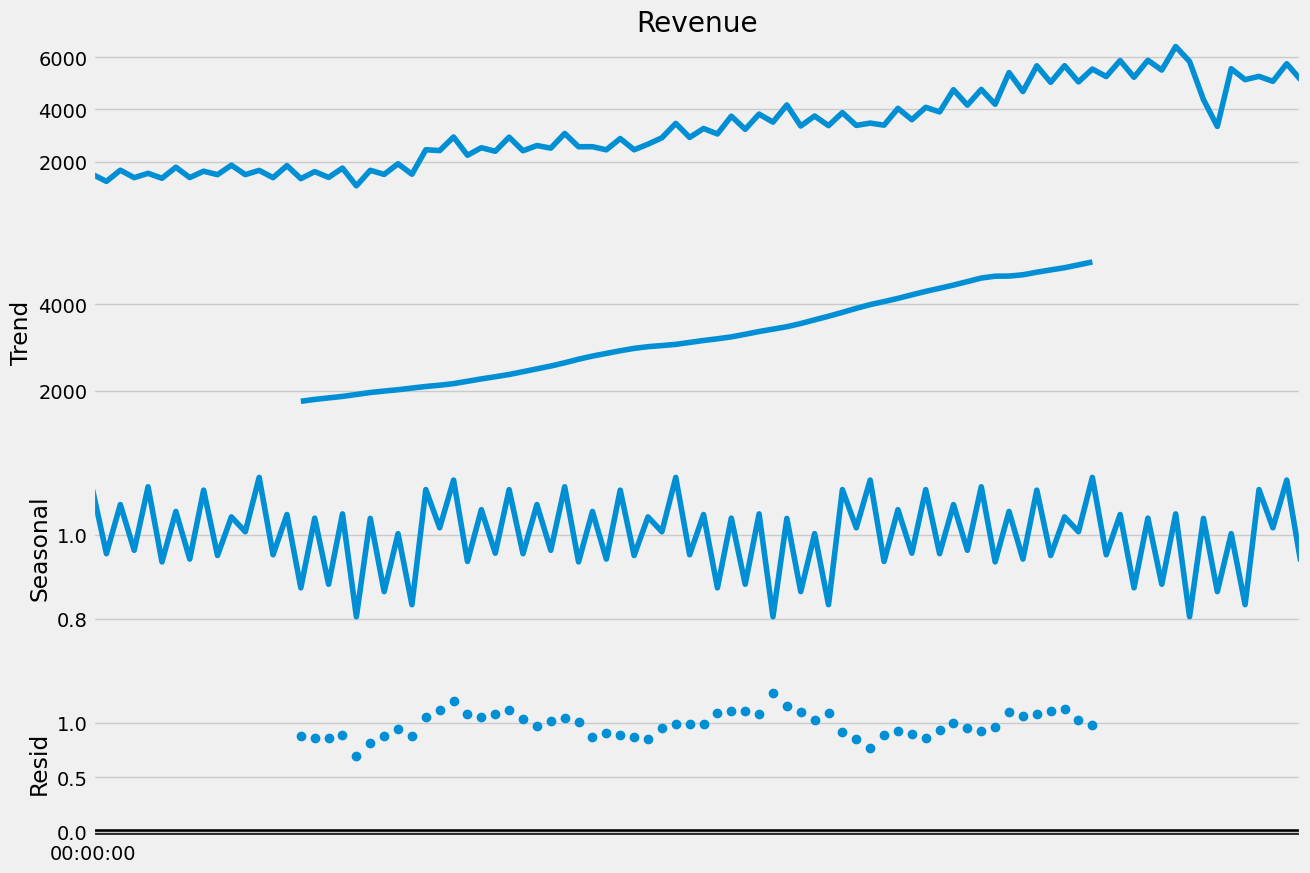

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure your data has a DatetimeIndex if it's not already
data.index = pd.to_datetime(data.index)

# Use 'period' instead of 'freq'
result = seasonal_decompose(data["Revenue"], model='multiplicative', period=30)

# Plot the decomposition result
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()

I will use the Seasonal ARIMA (SARIMA) model to forecast the quarterly sales revenue of Adidas.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

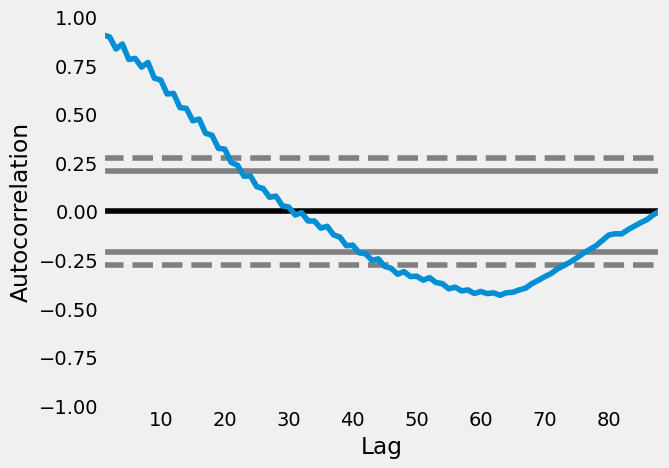

In [7]:
pd.plotting.autocorrelation_plot(data["Revenue"])

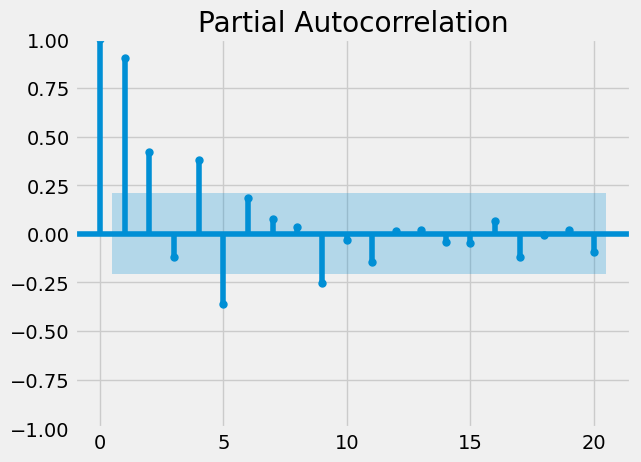

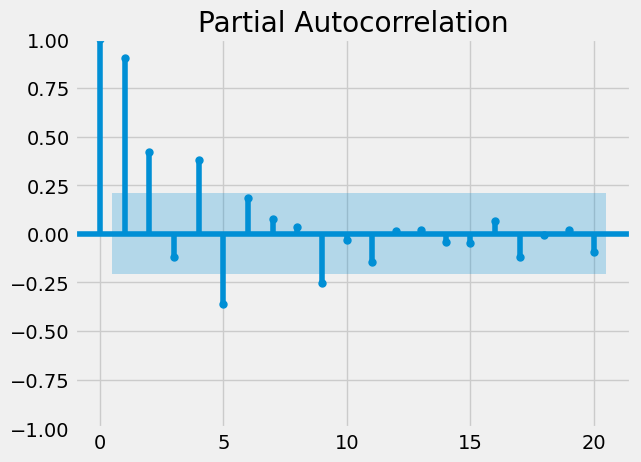

In [8]:
plot_pacf(data["Revenue"], lags = 20)

In [12]:
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving Average order
model=sm.tsa.statespace.SARIMAX(data['Revenue'],order=(p, d, q),seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ns will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ns will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -548.282
Date:                            Fri, 10 Jan 2025   AIC                           1106.564
Time:                                    22:49:20   BIC                           1118.152
Sample:                                01-01-1970   HQIC                          1111.191
                                     - 01-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7176      0.053     13.636      0.000       0.614       0.821
ma.L1         -0.9981      0.546   

In [13]:
predictions = model.predict(len(data), len(data)+7)
print(predictions)

1970-01-01 00:00:00.000000088    5821.163245
1970-01-01 00:00:00.000000089    5422.104735
1970-01-01 00:00:00.000000090    6515.955097
1970-01-01 00:00:00.000000091    5899.908612
1970-01-01 00:00:00.000000092    6275.658026
1970-01-01 00:00:00.000000093    5667.940633
1970-01-01 00:00:00.000000094    6646.274345
1970-01-01 00:00:00.000000095    6105.787876
Freq: ns, Name: predicted_mean, dtype: float64


<Axes: >

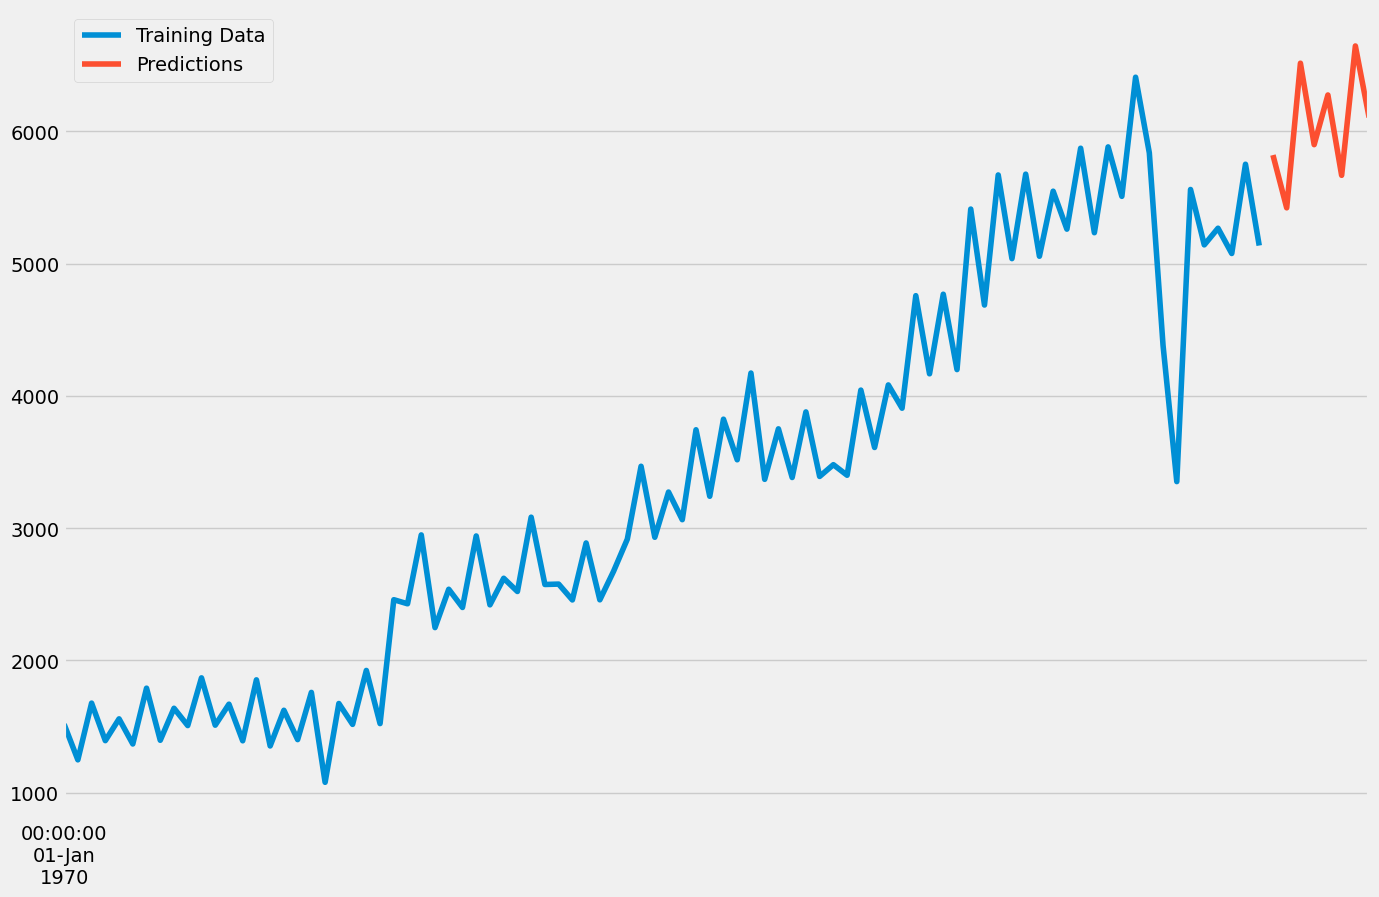

In [14]:
data["Revenue"].plot(legend=True,
                     label="Training Data",
                     figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")